In [1]:

# Core
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data preparation imports (from 03 Data Preparation)
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder

# Supervised learning imports (from 04 Supervised Learning)
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("titanic_survival.csv")

In [3]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
293,1185,0.0,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S
113,1005,1.0,3,"Buckley, Miss. Katherine",female,18.5,0,0,329944,7.2833,NaN,Q
100,992,NaN,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1,0,11778,55.4417,C116,C
195,1087,0.0,3,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,NaN,S
46,938,0.0,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C
299,1191,NaN,3,"Johansson, Mr. Nils",male,29.0,0,0,347467,7.8542,NaN,S
338,1230,0.0,2,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,S
297,1189,0.0,3,"Samaan, Mr. Hanna",male,NaN,2,0,2662,21.6792,NaN,C
124,1016,0.0,3,"Kennedy, Mr. John",male,NaN,0,0,368783,7.7500,NaN,Q
28,920,0.0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [4]:
df["Name"].unique()

array(['Kelly, Mr. James', 'Wilkes, Mrs. James (Ellen Needs)',
       'Myles, Mr. Thomas Francis', 'Wirz, Mr. Albert',
       'Hirvonen, Mrs. Alexander (Helga E Lindqvist)',
       'Svensson, Mr. Johan Cervin', 'Connolly, Miss. Kate',
       'Caldwell, Mr. Albert Francis',
       'Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
       'Davies, Mr. John Samuel', 'Ilieff, Mr. Ylio',
       'Jones, Mr. Charles Cresson',
       'Snyder, Mrs. John Pillsbury (Nelle Stevenson)',
       'Howard, Mr. Benjamin',
       'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)',
       'del Carlo, Mrs. Sebastiano (Argenia Genovesi)',
       'Keane, Mr. Daniel', 'Assaf, Mr. Gerios',
       'Ilmakangas, Miss. Ida Livija',
       'Assaf Khalil, Mrs. Mariana (Miriam")"', 'Rothschild, Mr. Martin',
       'Olsen, Master. Artur Karl',
       'Flegenheim, Mrs. Alfred (Antoinette)',
       'Williams, Mr. Richard Norris II',
       'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)',
       'Robins, Mr. Alexander

In [5]:
df.drop(columns=["Name"], axis=1, inplace=True)

In [6]:
df["Survived"].unique()

array([ 0.,  1., nan])

In [7]:
df["Survived"] = pd.to_numeric(df["Survived"], errors='coerce')
df = df.dropna(subset=["Survived"])

# Convert to int
df["Survived"] = df["Survived"].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  325 non-null    int64  
 1   Survived     325 non-null    int64  
 2   Pclass       325 non-null    int64  
 3   Sex          325 non-null    object 
 4   Age          255 non-null    float64
 5   SibSp        325 non-null    int64  
 6   Parch        325 non-null    int64  
 7   Ticket       325 non-null    object 
 8   Fare         325 non-null    float64
 9   Cabin        69 non-null     object 
 10  Embarked     325 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 30.5+ KB


In [9]:
df["Survived"] = pd.to_numeric(df["Survived"], downcast="integer")

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,NaN,S
7,899,0,2,male,26.0,1,1,248738,29.0000,NaN,S


In [11]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [12]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [13]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,1,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,0,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,0,27.0,0,0,315154,8.6625,NaN,S
7,899,0,2,0,26.0,1,1,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,0,NaN,0,0,359309,8.0500,NaN,S


In [14]:
df["Cabin"].isnull().sum()

np.int64(256)

In [15]:
df.drop(columns=["Cabin"], axis=1, inplace=True)

In [16]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,0,34.5,0,0,330911,7.8292,Q
1,893,1,3,1,47.0,1,0,363272,7.0000,S
2,894,0,2,0,62.0,0,0,240276,9.6875,Q
3,895,0,3,0,27.0,0,0,315154,8.6625,S
7,899,0,2,0,26.0,1,1,248738,29.0000,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,1,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,0,NaN,0,0,359309,8.0500,S


In [17]:
df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [18]:
df = pd.concat([df, pd.get_dummies(df["Embarked"])], axis=1)
df.drop(columns=["Embarked"], axis=1, inplace=True)

In [19]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,892,0,3,0,34.5,0,0,330911,7.8292,False,True,False
1,893,1,3,1,47.0,1,0,363272,7.0000,False,False,True
2,894,0,2,0,62.0,0,0,240276,9.6875,False,True,False
3,895,0,3,0,27.0,0,0,315154,8.6625,False,False,True
7,899,0,2,0,26.0,1,1,248738,29.0000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,NaN,0,0,A.5. 3236,8.0500,False,False,True
414,1306,1,1,1,39.0,0,0,PC 17758,108.9000,True,False,False
415,1307,0,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,False,False,True
416,1308,0,3,0,NaN,0,0,359309,8.0500,False,False,True


In [20]:
df["Ticket"].unique()

array(['330911', '363272', '240276', '315154', '248738', '2657',
       'A/4 48871', '694', '21228', '24065', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'PC 17598', 'PC 17597',
       'PC 17608', 'A/5. 3337', '2698', '113054', 'SC/AH 3085',
       'W./C. 6607', '13236', '2682', '342712', '345768', '1601',
       '113778', '237249', '11753', 'STON/O 2. 3101291', 'PC 17594',
       '370374', '11813', '13695', 'SC/PARIS 2168', '29105', '19950',
       'SC/A.3 2861', '382652', '349232', '237216', '347090', '334914',
       'F.C.C. 13534', '113796', '382653', 'PC 17562', '113503', '359306',
       '248744', '2678', 'PC 17483', '19924', '240261', '2660', '330844',
       'A/4 31416', '364856', '29103', '345498', 'F.C. 12750', '376563',
       '13905', '350033', '19877', 'STON/O 2. 3101268', '228414',
       '365235', '347070', '2625', 'C 4001', '330920', '383162', '3410',
       '237734', 'PC 17531', '329944', '2680', '2681', '13050',
       'SC/AH 29037', 'C.A. 33595',

In [21]:
df["Ticket"].isnull().sum()

np.int64(0)

In [22]:
df["Ticket_Number"] = df["Ticket"].str.extract(r"(\d+)$")[0].astype(int)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S,Ticket_Number
0,892,0,3,0,34.5,0,0,330911,7.8292,False,True,False,330911
1,893,1,3,1,47.0,1,0,363272,7.0000,False,False,True,363272
2,894,0,2,0,62.0,0,0,240276,9.6875,False,True,False,240276
3,895,0,3,0,27.0,0,0,315154,8.6625,False,False,True,315154
7,899,0,2,0,26.0,1,1,248738,29.0000,False,False,True,248738


In [24]:
df["Ticket_Number"].sample(50)

213      24065
80        2678
282     364859
20       17603
349      13528
242      16966
203      26360
24       17608
46       17594
288       2655
70      382653
263     350405
266     112051
154     347077
258      28404
232    3101266
413       3236
340      15185
355     113044
204      34050
30        3085
19        2696
247      28220
362      31352
61      237216
127     367226
44       11753
265     349235
378        680
50       13695
82       19924
191     111163
196      16966
361       2079
366       2689
270      13050
157     347469
304     383123
177      11778
124     368783
260     345572
384       2159
174     347077
89       29103
245      17464
383     376566
289       1478
158     110489
414      17758
64       17608
Name: Ticket_Number, dtype: int64

In [25]:
df.drop(columns=["Ticket"], axis=1, inplace=True)

In [26]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age              70
SibSp             0
Parch             0
Fare              0
C                 0
Q                 0
S                 0
Ticket_Number     0
dtype: int64

In [27]:
df["Survived"].unique()

array([0, 1], dtype=int8)

<Axes: >

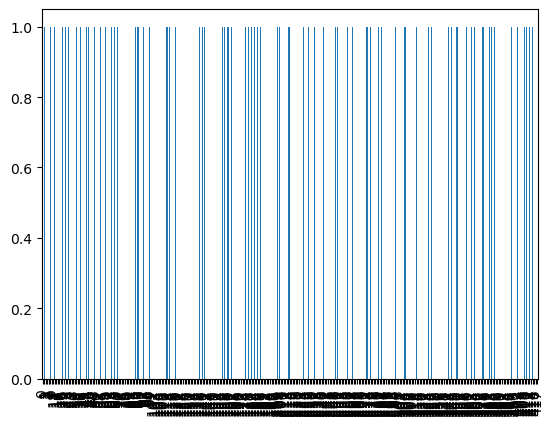

In [28]:
df["Survived"].plot.bar()

In [29]:
df = df.dropna(subset=["Survived"])

In [30]:
df.drop(columns=["PassengerId"], axis=1, inplace=True)

In [31]:
df.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age              70
SibSp             0
Parch             0
Fare              0
C                 0
Q                 0
S                 0
Ticket_Number     0
dtype: int64

In [32]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [33]:
df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
C                0
Q                0
S                0
Ticket_Number    0
dtype: int64

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Ticket_Number
0,0,3,0,34.5,0,0,7.8292,False,True,False,330911
1,1,3,1,47.0,1,0,7.0000,False,False,True,363272
2,0,2,0,62.0,0,0,9.6875,False,True,False,240276
3,0,3,0,27.0,0,0,8.6625,False,False,True,315154
7,0,2,0,26.0,1,1,29.0000,False,False,True,248738


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Prepare data
X = df.drop(columns=["Survived"])
y = df["Survived"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred),
        "Recall": recall_score(y_test, pred),
        "F1-Score": f1_score(y_test, pred),
        "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

results_df = pd.DataFrame(results).T
print(results_df)
print(f"\nBest Model: {results_df['F1-Score'].idxmax()}")

                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression       1.0        1.0     1.0       1.0      1.0
Decision Tree             1.0        1.0     1.0       1.0      1.0
KNN                       1.0        1.0     1.0       1.0      1.0
Random Forest             1.0        1.0     1.0       1.0      1.0

Best Model: Logistic Regression
